In [36]:
import pandas as pd
import numpy as np

from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [37]:
df_train = pd.read_csv('sf04classification/train.csv', encoding='utf8', index_col='_id')
df_test = pd.read_csv('sf04classification/test.csv', encoding='utf8', index_col='_id')
#df_train = pd.read_csv('sf04classification/train.csv', encoding='utf8')
#df_test = pd.read_csv('sf04classification/test.csv', encoding='utf8')
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
#df = df_test.append(df_train).reset_index(drop=True)
df = df_test.append(df_train)

In [38]:
#train.info() #full, got objects

In [39]:
#test.info() #no tgt column. full, got objects

In [40]:
def preproc_data(df_input):
    df_output = df_input.copy()

    # category code
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 
                                                   'education', 'default', 
                                                   'housing', 'loan', 
                                                   'contact', 'month', 
                                                   'day_of_week', 
                                                   'poutcome'])
        
    return df_output

In [41]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)



In [44]:
X = df_train_preproc.drop(['target'], axis=1)
X_test = df_test_preproc.drop(['target'], axis=1)

y = df_train_preproc['target']
y_test = df_test_preproc['target']

print(X.shape, X_test.shape, y.shape, y_test.shape)

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train_.shape, X_test_.shape, y_train_.shape, y_test_.shape)

(24712, 63) (16476, 63) (24712,) (16476,)
(16557, 63) (8155, 63) (16557,) (8155,)


dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_, y_train_)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_, y_train_)

lr = LogisticRegression()
lr.fit(X_train_, y_train_)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_, y_train_)

### Ниже показан самый главный классификатор (nr.employed)

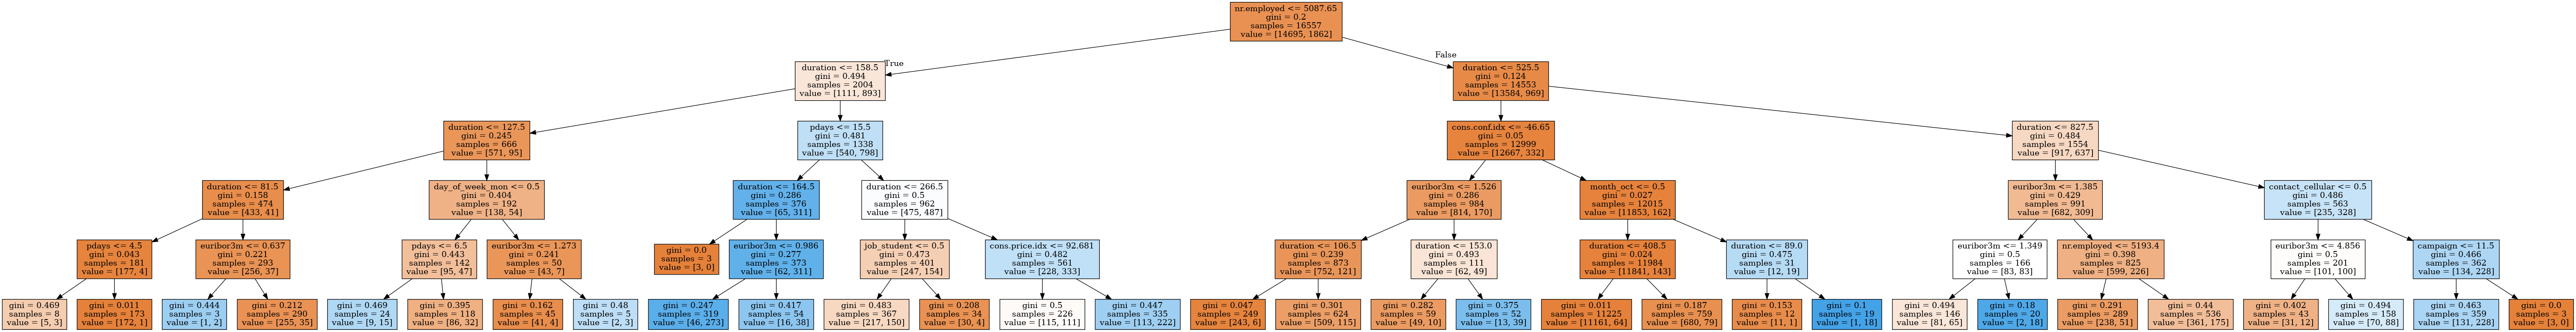

In [45]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_, y_train_)

dot_data = StringIO()
export_graphviz(dtc, feature_names=X_train_.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Ниже показан самый главный классификатор (nr.employed)

In [46]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_, y_train_)
dtc_kfold = cross_val_score(
    dtc,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_, y_train_)
knn_kfold = cross_val_score(
    knn,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()


lr = LogisticRegression()
lr.fit(X_train_, y_train_)
lr_kfold = cross_val_score(
    lr,
    X_train_,
    y_train_,
    scoring='roc_auc',
    cv = cv.split(X_train_, y_train_)
).mean()


print("Cross Val Score")
print("dtc_kfold: ", dtc_kfold,
      "\nknn_kfold: ", knn_kfold,
      "\nlr_kfold: ", lr_kfold   
     )

Cross Val Score
dtc_kfold:  0.922985852647925 
knn_kfold:  0.7142502399129851 
lr_kfold:  0.9290878145098416


In [47]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_, y_train_)


knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
knn.fit(X_train_, y_train_)


lr = LogisticRegression(n_jobs=-1)
lr.fit(X_train_, y_train_)


print("Roc AUC Score")
print(
    "DTC: ", roc_auc_score(y_test_, dtc.predict_proba(X_test_)[:,1]),
    "\nKNN: ", roc_auc_score(y_test_, knn.predict_proba(X_test_)[:,1]),
    "\nLR: ", roc_auc_score(y_test_, lr.predict_proba(X_test_)[:,1])
)

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Roc AUC Score
DTC:  0.9207019550671003 
KNN:  0.7056237150013084 
LR:  0.9323285110836979


In [ ]:
dtc = DecisionTreeClassifier(max_depth=15)
dtc.fit(X_train_, y_train_)
roc_auc_score(y_test_, dtc.predict_proba(X_test_)[:,1])

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=5000, algorithm="brute", weights="distance")
knn.fit(X_train_, y_train_)
roc_auc_score(y_test_, knn.predict_proba(X_test_)[:,1])

In [ ]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(X_train_, y_train_)
roc_auc_score(y_test_, lr.predict_proba(X_test_)[:,1])


In [69]:
result = df_test_preproc.copy()
result['target'] = lr.predict_proba(X_test)[:,1].astype('int64')
result['target'].to_csv('submit.csv')